### 로지스틱 회귀 - 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Sigmoid 함수

In [3]:
def sigmoid(x, a=1, b=0):
    return(1. / (1 + np.exp(-a * (x-b))))

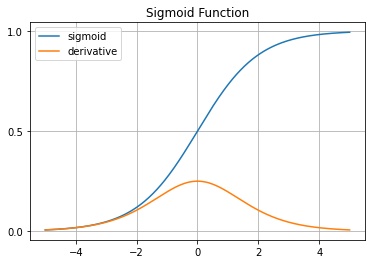

In [4]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label="sigmoid")
plt.plot(xs, ys*(1-ys), label="derivative")
plt.title("Sigmoid Function")
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

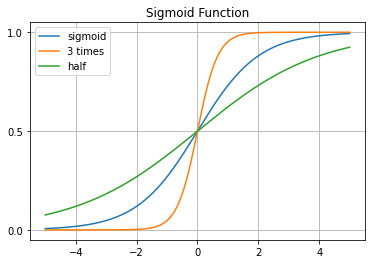

In [5]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label="sigmoid")
plt.plot(xs, y3, label="3 times")
plt.plot(xs, y_half, label="half")
plt.title("Sigmoid Function")
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

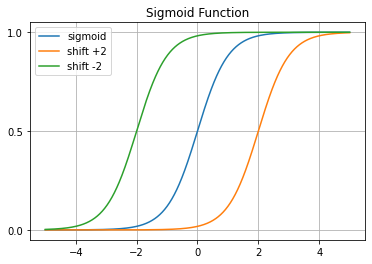

In [6]:
ys = sigmoid(xs, a=2)
y_plus2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-2)

plt.plot(xs, ys, label="sigmoid")
plt.plot(xs, y_plus2, label="shift +2")
plt.plot(xs, y_minus2, label="shift -2")
plt.title("Sigmoid Function")
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

- 이진분류

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [8]:
# 로지스틱 회귀를 사용하려면 정규화/표준화 해야 함
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2022
)

In [10]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [11]:
lrc.coef_

array([[-0.34405498, -0.48237478, -0.3341254 , -0.42915846, -0.07879762,
         0.56207448, -0.73975027, -0.60531031,  0.04342698,  0.15496439,
        -1.25355709,  0.01114107, -0.78491641, -0.96111243, -0.26653613,
         0.90404346,  0.08264883, -0.33151113,  0.57540241,  0.435543  ,
        -0.9384629 , -1.11676756, -0.79996886, -0.95345339, -0.66727363,
         0.18915746, -0.93918052, -1.03420112, -1.16072205, -0.16299362]])

In [12]:
lrc.intercept_

array([0.18666884])

In [13]:
X_test[0]

array([-0.60418105, -0.84697064, -0.61863699, -0.60178112,  0.06189392,
       -0.61954251, -0.59371599, -0.78127769,  0.97619425, -0.44195364,
       -0.64269945,  0.069211  , -0.70544794, -0.53193707, -0.35734079,
       -0.41124299, -0.39203923, -0.77360013, -0.0995627 , -0.44932623,
       -0.5382468 , -0.12656597, -0.58026425, -0.54966965,  0.23370693,
       -0.34329308, -0.21823207, -0.58296891,  0.77369434, -0.26077671])

In [15]:
# X_test[0] 가 1이 될 확률
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([4.73309707])

In [18]:
# X_test[0] 가 1이 될 확률 / 이중분류에서는 sigmoid함수 적용
sigmoid(val)

array([0.99127757])

In [17]:
lrc.predict_proba(X_test[:5])

array([[8.72242699e-03, 9.91277573e-01],
       [2.41622685e-01, 7.58377315e-01],
       [1.00000000e+00, 1.21217433e-10],
       [6.40861429e-07, 9.99999359e-01],
       [3.25148309e-04, 9.99674852e-01]])

- 다중 분류

In [19]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, random_state=2022
)

In [20]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [21]:
lrc2.predict_proba(X_test[:5])

array([[9.99279600e-01, 4.12995370e-04, 3.07404430e-04],
       [9.95459920e-01, 3.04646714e-03, 1.49361273e-03],
       [8.63617063e-03, 1.34269693e-04, 9.91229560e-01],
       [7.75565213e-03, 3.10436345e-03, 9.89139984e-01],
       [9.94151690e-04, 9.89722631e-01, 9.28321721e-03]])

In [22]:
lrc2.predict(X_test[:5])

array([0, 0, 2, 2, 1])

In [23]:
lrc2.coef_

array([[ 0.73292343,  0.24529243,  0.4625104 , -0.83327624,  0.03787191,
         0.2198092 ,  0.64010231, -0.16699086,  0.15389364,  0.14377882,
         0.12029171,  0.67911303,  1.0101582 ],
       [-0.91395256, -0.48165767, -0.83332071,  0.59074468, -0.08596402,
        -0.01348885,  0.34230068,  0.17131402,  0.23534429, -0.96864414,
         0.66757359,  0.04717943, -1.09745204],
       [ 0.18102913,  0.23636524,  0.37081031,  0.24253157,  0.04809211,
        -0.20632035, -0.98240299, -0.00432316, -0.38923793,  0.82486532,
        -0.7878653 , -0.72629246,  0.08729384]])

In [24]:
lrc2.intercept_

array([ 0.38394662,  0.67109374, -1.05504036])

In [27]:
val2 = np.dot(lrc2.coef_, X_test[0]) + lrc2.intercept_
val2

array([ 5.29265972, -2.49869379, -2.79396593])

In [28]:
# 다중 분류에서는 시그모이드 함수를 적용하지 않음
sigmoid(val2)

array([0.99499679, 0.0759498 , 0.05765112])

In [31]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [32]:
softmax(np.array([0,0,0]))

array([0.33333333, 0.33333333, 0.33333333])

In [33]:
# 다중 분류에서는 소프트맥스 함수 적용
softmax(val2)

array([9.9927960e-01, 4.1299537e-04, 3.0740443e-04])